<a href="https://colab.research.google.com/github/kyosshk/NN_DL_4/blob/main/ICP4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#1
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Reading the CSV file ‘data.csv’.

df = pd.read_csv("/content/data.csv")

#Show the basic statistical description about the data.

print(df.describe())

         Duration       Pulse    Maxpulse     Calories
count  169.000000  169.000000  169.000000   164.000000
mean    63.846154  107.461538  134.047337   375.790244
std     42.299949   14.510259   16.450434   266.379919
min     15.000000   80.000000  100.000000    50.300000
25%     45.000000  100.000000  124.000000   250.925000
50%     60.000000  105.000000  131.000000   318.600000
75%     60.000000  111.000000  141.000000   387.600000
max    300.000000  159.000000  184.000000  1860.400000


In [3]:
# Check for null values in the DataFrame
null_values = df.isnull()

# Count the number of null values in each column
null_counts = null_values.sum()

# Display the columns with their respective counts of null values
print(null_counts)
# df.isna().sum()

Duration    0
Pulse       0
Maxpulse    0
Calories    5
dtype: int64


In [4]:
#d)Replacing Null values with the mean for Calories Column
df["Calories"].fillna(df["Calories"].mean(),inplace=True)
print(df)

     Duration  Pulse  Maxpulse  Calories
0          60    110       130     409.1
1          60    117       145     479.0
2          60    103       135     340.0
3          45    109       175     282.4
4          45    117       148     406.0
..        ...    ...       ...       ...
164        60    105       140     290.8
165        60    110       145     300.0
166        60    115       145     310.2
167        75    120       150     320.4
168        75    125       150     330.4

[169 rows x 4 columns]


In [5]:
#verifying any columns still with null values
df.isna().sum()

Duration    0
Pulse       0
Maxpulse    0
Calories    0
dtype: int64

In [6]:
#Selecting at least two columns and aggregate the data using: min, max, count, mean
result = df[['Duration','Pulse']].agg(['min', 'max','count','mean'])
result

,Duration,Pulse
min,15.000000,80.000000
max,300.000000,159.000000
count,169.000000,169.000000
mean,63.846154,107.461538


In [7]:
#Filtering the dataframe to select the rows with calories values between 500 and 1000.
df = df[(df['Calories'] > 500) & (df['Calories'] < 1000)]
print(df)

     Duration  Pulse  Maxpulse  Calories
51         80    123       146     643.1
62        160    109       135     853.0
65        180     90       130     800.4
66        150    105       135     873.4
67        150    107       130     816.0
72         90    100       127     700.0
73        150     97       127     953.2
75         90     98       125     563.2
78        120    100       130     500.4
90        180    101       127     600.1
99         90     93       124     604.1
103        90     90       100     500.4
106       180     90       120     800.3
108        90     90       120     500.3


In [8]:
#Filter the dataframe to select the rows with calories values > 500 and pulse < 100
df = df[(df['Calories'] > 500) & (df['Pulse'] < 100)]
print(df)

     Duration  Pulse  Maxpulse  Calories
65        180     90       130     800.4
73        150     97       127     953.2
75         90     98       125     563.2
99         90     93       124     604.1
103        90     90       100     500.4
106       180     90       120     800.3
108        90     90       120     500.3


In [9]:
#Create a new “df_modified” dataframe that contains all the columns from df except for “Maxpulse”
df_modified = df.loc[:, df.columns!='Maxpulse']
df_modified

,Duration,Pulse,Calories
65,180,90,800.4
73,150,97,953.2
75,90,98,563.2
99,90,93,604.1
103,90,90,500.4
106,180,90,800.3
108,90,90,500.3


In [10]:
#Delete the “Maxpulse” column from the main df dataframe
if "Maxpulse" in df.columns:
    df.drop("Maxpulse", axis=1, inplace=True) #drop method removes the specified column or rows
print(df)

     Duration  Pulse  Calories
65        180     90     800.4
73        150     97     953.2
75         90     98     563.2
99         90     93     604.1
103        90     90     500.4
106       180     90     800.3
108        90     90     500.3


In [11]:
#Converting the datatype of Calories column to int datatype.
df["Calories"] = df["Calories"].astype(int)
print(df)

     Duration  Pulse  Calories
65        180     90       800
73        150     97       953
75         90     98       563
99         90     93       604
103        90     90       500
106       180     90       800
108        90     90       500


<Axes: xlabel='Duration', ylabel='Calories'>

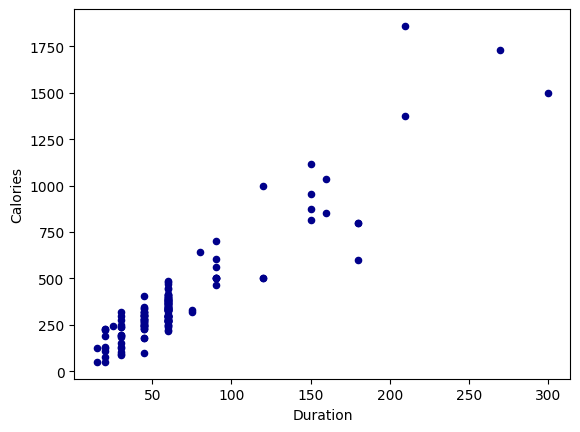

In [12]:
#Using pandas plot to create a scatter plot for the two columns.

data = pd.read_csv("data.csv")
data.plot(x="Duration", y="Calories", kind="scatter", c= "darkblue")

In [13]:
#2. Linear Regression

# Importing the libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the datasets

saldata = pd.read_csv('/content/Salary_Data (2).csv')

X = saldata.iloc[:, :-1].values #excluding last column
Y = saldata.iloc[:, 1].values #just salary column

saldata.info()
saldata.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [14]:
# Split the dataset into the Training set and Test set

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=1/3, random_state=0)

## Print the split data
print("Below is the Split Data:")
print("Train features:")
print(pd.DataFrame(X_train).head())

print("Train targets:")
print(pd.DataFrame(Y_train).head())

print("Test features:")
print(pd.DataFrame(X_test).head())

print("Test targets:")
print(pd.DataFrame(Y_test).head())

Below is the Split Data:
Train features:
     0
0  2.9
1  5.1
2  3.2
3  4.5
4  8.2
Train targets:
          0
0   56642.0
1   66029.0
2   64445.0
3   61111.0
4  113812.0
Test features:
      0
0   1.5
1  10.3
2   4.1
3   3.9
4   9.5
Test targets:
          0
0   37731.0
1  122391.0
2   57081.0
3   63218.0
4  116969.0


In [15]:
# Train and predict the model
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, Y_train) #predict method takes the test set features returns the predicted target variables
Y_pred = model.predict(X_test)
print("Predicted values:", Y_pred)

Predicted values: [ 40835.10590871 123079.39940819  65134.55626083  63265.36777221
 115602.64545369 108125.8914992  116537.23969801  64199.96201652
  76349.68719258 100649.1375447 ]


In [16]:
# Calculate the mean_squared error
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(Y_test, Y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 21026037.329511296


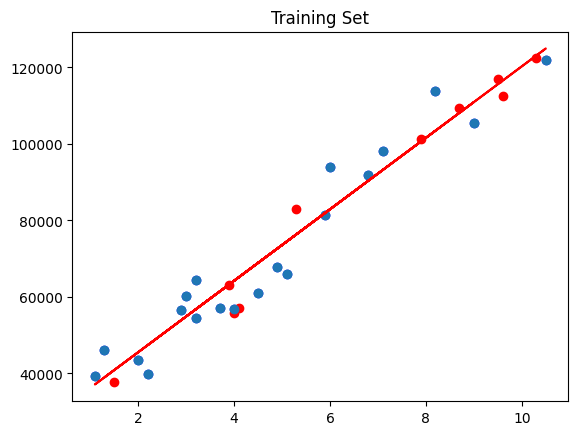

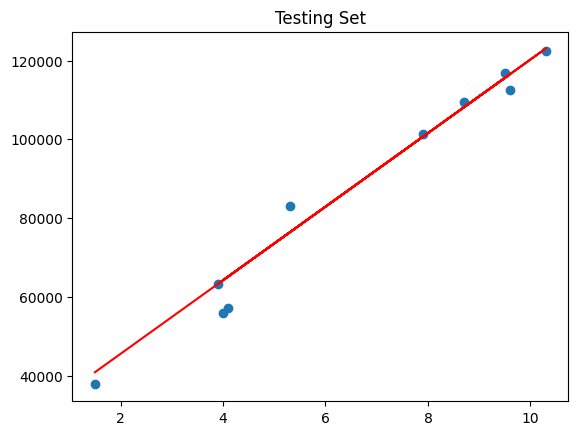

In [17]:
#Visualize both train and test data using scatter plot.
#The scatter function is used to plot the training data, and the plot function is used to plot the predicted values
import matplotlib.pyplot as plt

plt.scatter(X_train, Y_train, color='blue', label='Training data')
plt.scatter(X_test, Y_test, color='red', label='Test data')


# Training Data
plt.scatter(X_train, Y_train)
plt.plot(X_train, model.predict(X_train), color='red')
plt.title('Training Set')
plt.show()

# Testing Data
plt.scatter(X_test, Y_test)
plt.plot(X_test, model.predict(X_test), color='red')
plt.title('Testing Set')
plt.show()